In [1]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier



In [2]:
matches = pd.read_csv("E:/BTL/KHDL/matches_after_preprocessing.csv", index_col=0)

In [3]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,...,14,6,2.000000,1.333333,8.000000,3.666667,14.633333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,5,1.666667,1.666667,5.666667,3.666667,15.366667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.7,...,19,6,1.000000,1.666667,7.000000,3.666667,16.566667,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.0,...,16,6,0.666667,1.000000,9.666667,4.000000,16.566667,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,6,0.333333,0.666667,9.666667,2.666667,19.333333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,2023-12-09,15:00,Matchweek 16,Sat,Home,D,1.0,1.0,Nott'ham Forest,1.2,...,15,5,1.333333,1.666667,7.333333,4.000000,14.400000,0.333333,0.333333,0.333333
2594,2023-12-17,14:00,Matchweek 17,Sun,Away,L,0.0,3.0,West Ham,0.7,...,14,6,1.000000,1.000000,7.666667,3.666667,13.933333,0.333333,0.000000,0.000000
2595,2023-12-24,13:00,Matchweek 18,Sun,Home,W,2.0,1.0,Chelsea,1.3,...,13,6,0.666667,1.333333,10.333333,3.666667,17.166667,0.333333,0.000000,0.000000
2596,2023-12-27,19:30,Matchweek 19,Wed,Away,W,4.0,1.0,Brentford,2.4,...,19,2,1.000000,1.666667,12.666667,4.333333,17.466667,0.333333,0.000000,0.000000


In [4]:
train = matches[matches["date"] < '2022-11-01']
test = matches[matches["date"] > '2022-11-01']

In [5]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
X_train = train[predictors]
y_train = train["target"]
X_test = test[predictors]
y_test = test["target"]

In [6]:
X_test.drop(["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"], axis =1)

,venue_code,opp_code,hour,day_code
85,0,6,12,6
86,0,25,19,5
87,1,24,20,0
88,0,4,17,5
89,1,16,19,1
...,...,...,...,...
2593,1,18,15,5
2594,0,24,14,6
2595,1,6,13,6
2596,0,3,19,2


In [7]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds) 
accuracy_score = accuracy_score(y_test, preds)
precision_score = precision_score(y_test, preds)
recall_score = recall_score(y_test, preds)
f1_score = f1_score(y_test, preds)
print("confusion matrix", confusion_matrix)
print("accuracy score: ", accuracy_score)
print("precision score: ", precision_score)
print("recall score: ", recall_score)
print("f1 score: ", f1_score)

confusion matrix [[457  83]
 [111 250]]
accuracy score:  0.7846836847946725
precision score:  0.7507507507507507
recall score:  0.6925207756232687
f1 score:  0.7204610951008646


In [8]:
test_accuracy_compiled = []

test_accuracy = []
for n in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    clf.fit(X_train, y_train)
    test_accuracy.append(round(clf.score(X_test, y_test) * 100, 1))
test_accuracy_compiled.append(test_accuracy)

test_accuracy_compiled_np = np.transpose(np.array(test_accuracy_compiled))
test_accuracy_compiled_av = np.mean(test_accuracy_compiled_np, axis=1)

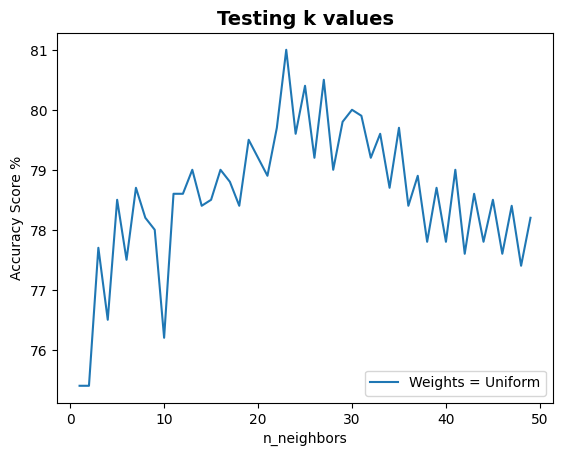

In [9]:
fig, ax = plt.subplots()
ax.plot(range(1, 50, 1), test_accuracy_compiled_av, label='Weights = Uniform')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Accuracy Score %')
ax.set_title('Testing k values', y=1, fontsize=14, fontweight='bold')
ax.legend(loc=4)
plt.savefig('ml_10_testing_k_values_uniform.png')
plt.show()

In [10]:
best_k = np.argmax(test_accuracy_compiled_av) + 1
best_accuracy = test_accuracy_compiled_av[best_k - 1]

print("Best k:", best_k)
print("Best accuracy score:", best_accuracy)

Best k: 23
Best accuracy score: 81.0


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN và đánh giá
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("confusion matrix", conf_matrix)
print("accuracy score: ", accuracy)
print("precision score: ", precision)
print("recall score: ", recall)
print("f1 score: ", f1)


confusion matrix [[503  37]
 [134 227]]
accuracy score:  0.8102108768035516
precision score:  0.8598484848484849
recall score:  0.628808864265928
f1 score:  0.7263999999999999


In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=skf)
cv_accuracy = round(np.mean(cv_scores) * 100, 1)

print('Cross-Validation Accuracy Score: ', cv_accuracy, '%')


Cross-Validation Accuracy Score:  77.5 %


In [13]:
cv_scores

array([0.8       , 0.75294118, 0.74631268, 0.79351032, 0.78466077])